In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
# number of walkers and steps
numSteps      = int(1E4)
numWalkLabels = ['2', 
                 '20', 
                 '200', 
                 '2,000', 
                 '20,000', 
                 '200,000']
numRuns       = 7

# Duration and standard deviations in seconds for each language
# FIXME: the last two are still waiting for results
pythonAvgs    = np.array([22.9,   23.0, 23.0,  30.1,   864., 0.])
pythonStdDevs = np.array([ 0.0889, 0.09, 0.164, 0.257, 235., 0.])

cppAvgs    = np.zeros(6)
cppStdDevs = np.zeros(6)

# Raw C++ data
walkerData = np.array([[10.6517, 10.6656, 10.6975, 10.6503, 10.6743, 10.6735, 10.6705],
                       [10.7305, 10.6793, 10.6815, 10.6852, 10.6897, 10.7158, 10.6674],
                       [10.9047, 10.8327, 10.8303, 10.7860, 10.7503, 10.8487, 10.7525],
                       [12.9034, 12.6992, 12.6744, 12.7256, 12.7543, 12.7296, 12.7298],
                       [34.1588, 35.9399, 34.6888, 34.0063, 34.0464, 34.3982, 33.9819],
                       [250.072, 258.988, 247.681, 327.725, 256.370, 257.881, 264.470]])

# Compute C++ statistics
for i,sim in enumerate(walkerData):
    cppAvgs[i]    = sim.mean()
    cppStdDevs[i] = sim.std(ddof=1)

# Remove unneeded variable
del walkerData

# Compute the speedups
speedups = []
for i in range(len(pythonAvgs)):
    factor = pythonAvgs[i] / cppAvgs[i]
    speedups.append(f'{factor:.2f}x')
    
speedups[-1] = 'inf?'

# Plot Just Python Times

In [3]:
# Plot settings
titleFontSize = 17
axisFontSize  = 13

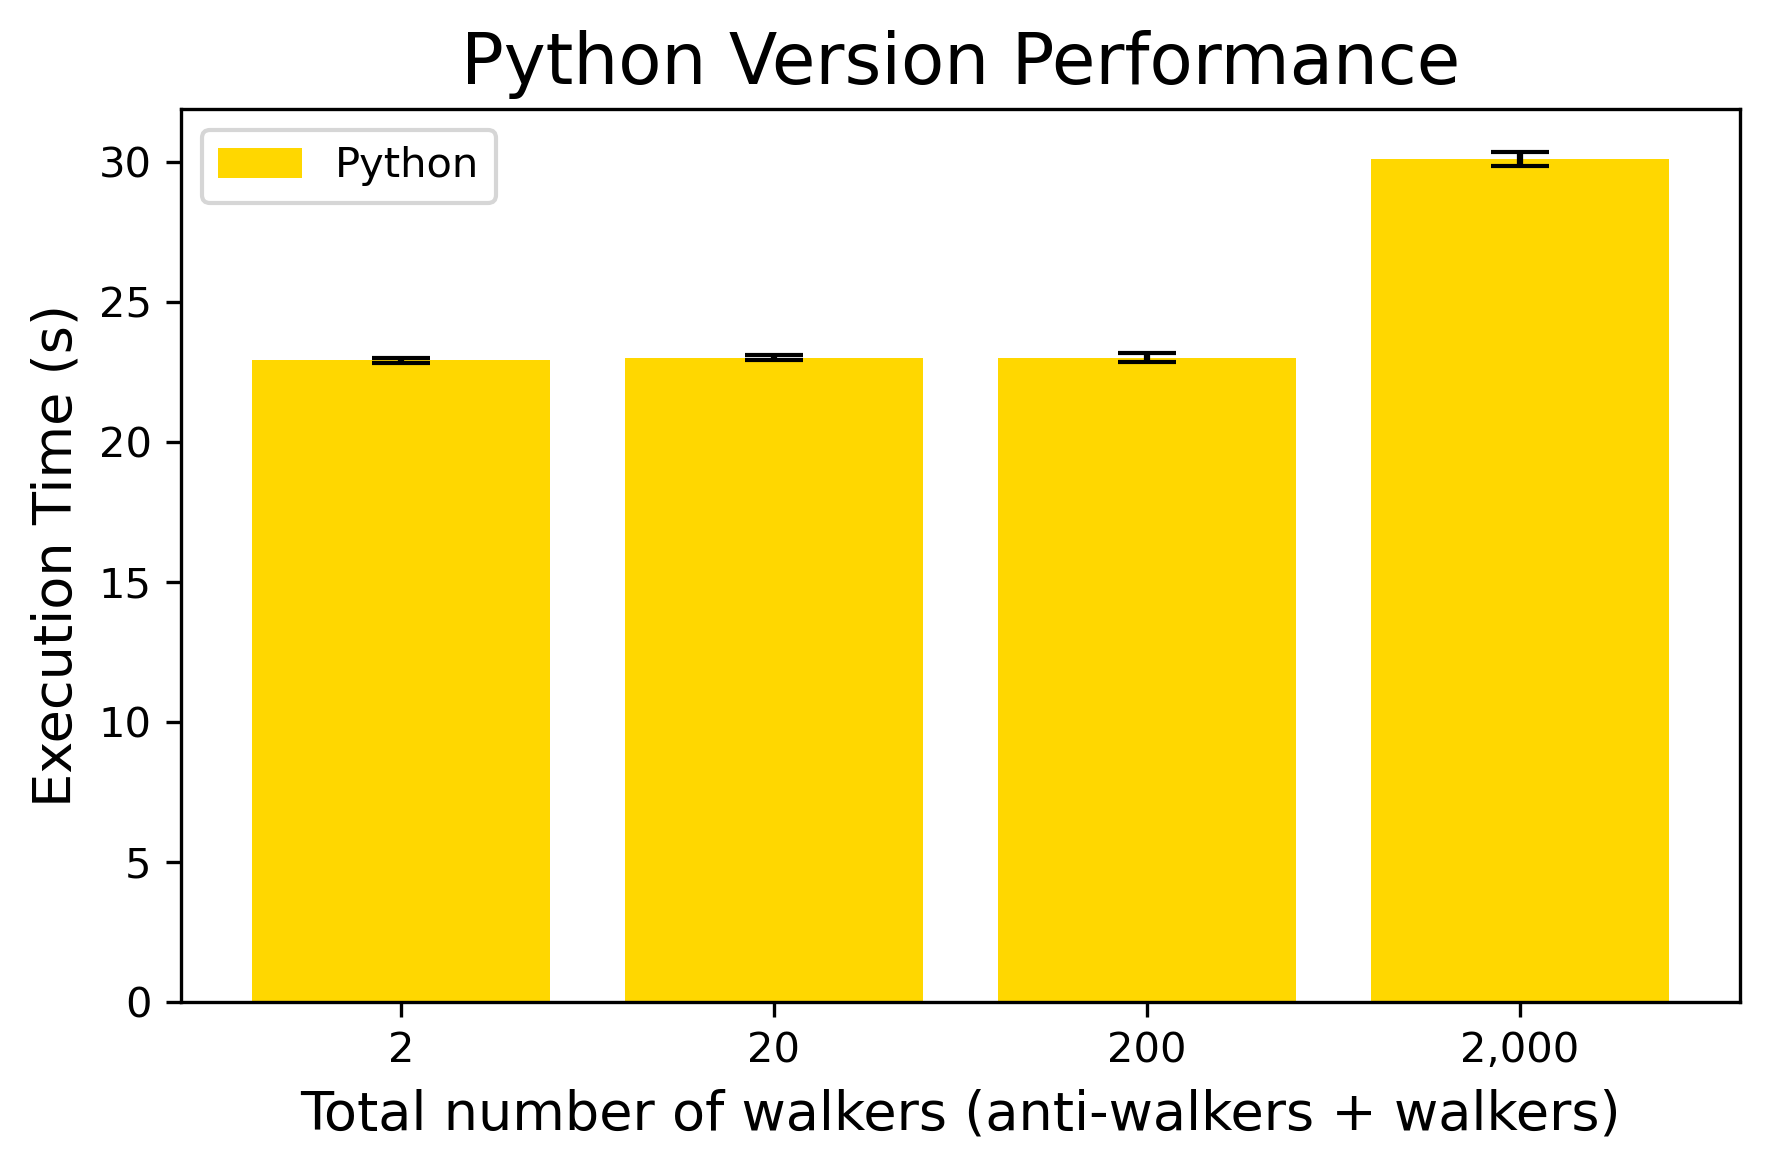

In [4]:
#Just plot the first 4
fig = plt.figure(dpi=300)

plt.bar(numWalkLabels[:-2],
        pythonAvgs[:-2],
#         log  = True,
        yerr = pythonStdDevs[:-2],
        capsize = 7.,
        color = 'gold',
        label = "Python")

plt.title('Python Version Performance', fontsize=titleFontSize)
plt.ylabel('Execution Time (s)', fontsize=axisFontSize)
plt.xlabel('Total number of walkers (anti-walkers + walkers)', fontsize=axisFontSize)

plt.legend(loc='upper left')

fig.patch.set_facecolor('white')
plt.tight_layout()

plt.show()

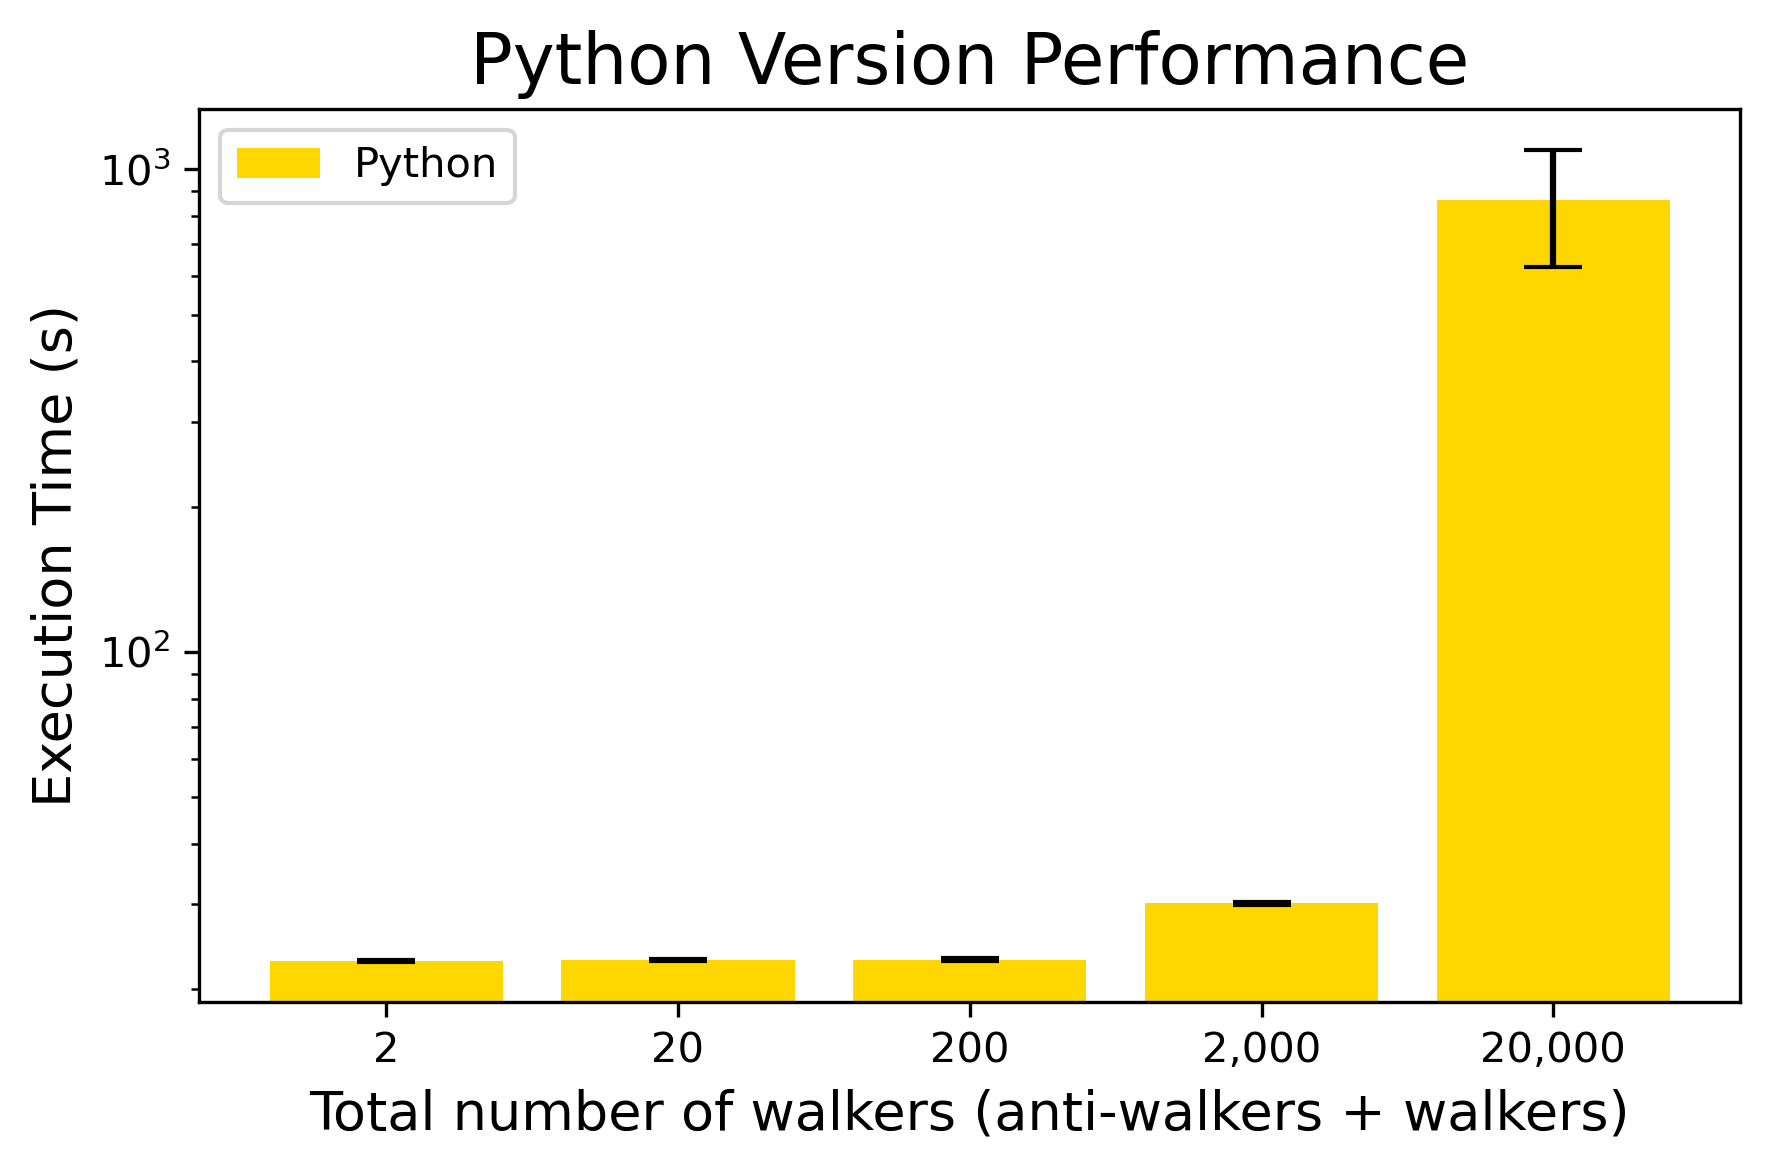

In [5]:
# Plot of all of them
fig = plt.figure(dpi=300)

plt.bar(range(len(numWalkLabels[:-1])),
        pythonAvgs[:-1],
        tick_label = numWalkLabels[:-1],
        log        = True,
        yerr       = pythonStdDevs[:-1],
        capsize    = 7.,
        color      = 'gold',
        label      = "Python")

plt.title('Python Version Performance', fontsize=titleFontSize)
plt.ylabel('Execution Time (s)', fontsize=axisFontSize)
plt.xlabel('Total number of walkers (anti-walkers + walkers)', fontsize=axisFontSize)

plt.legend(loc='upper left')

fig.patch.set_facecolor('white')
plt.tight_layout()

plt.show()
#cornflowerblue

# Plot C++ & Python Times

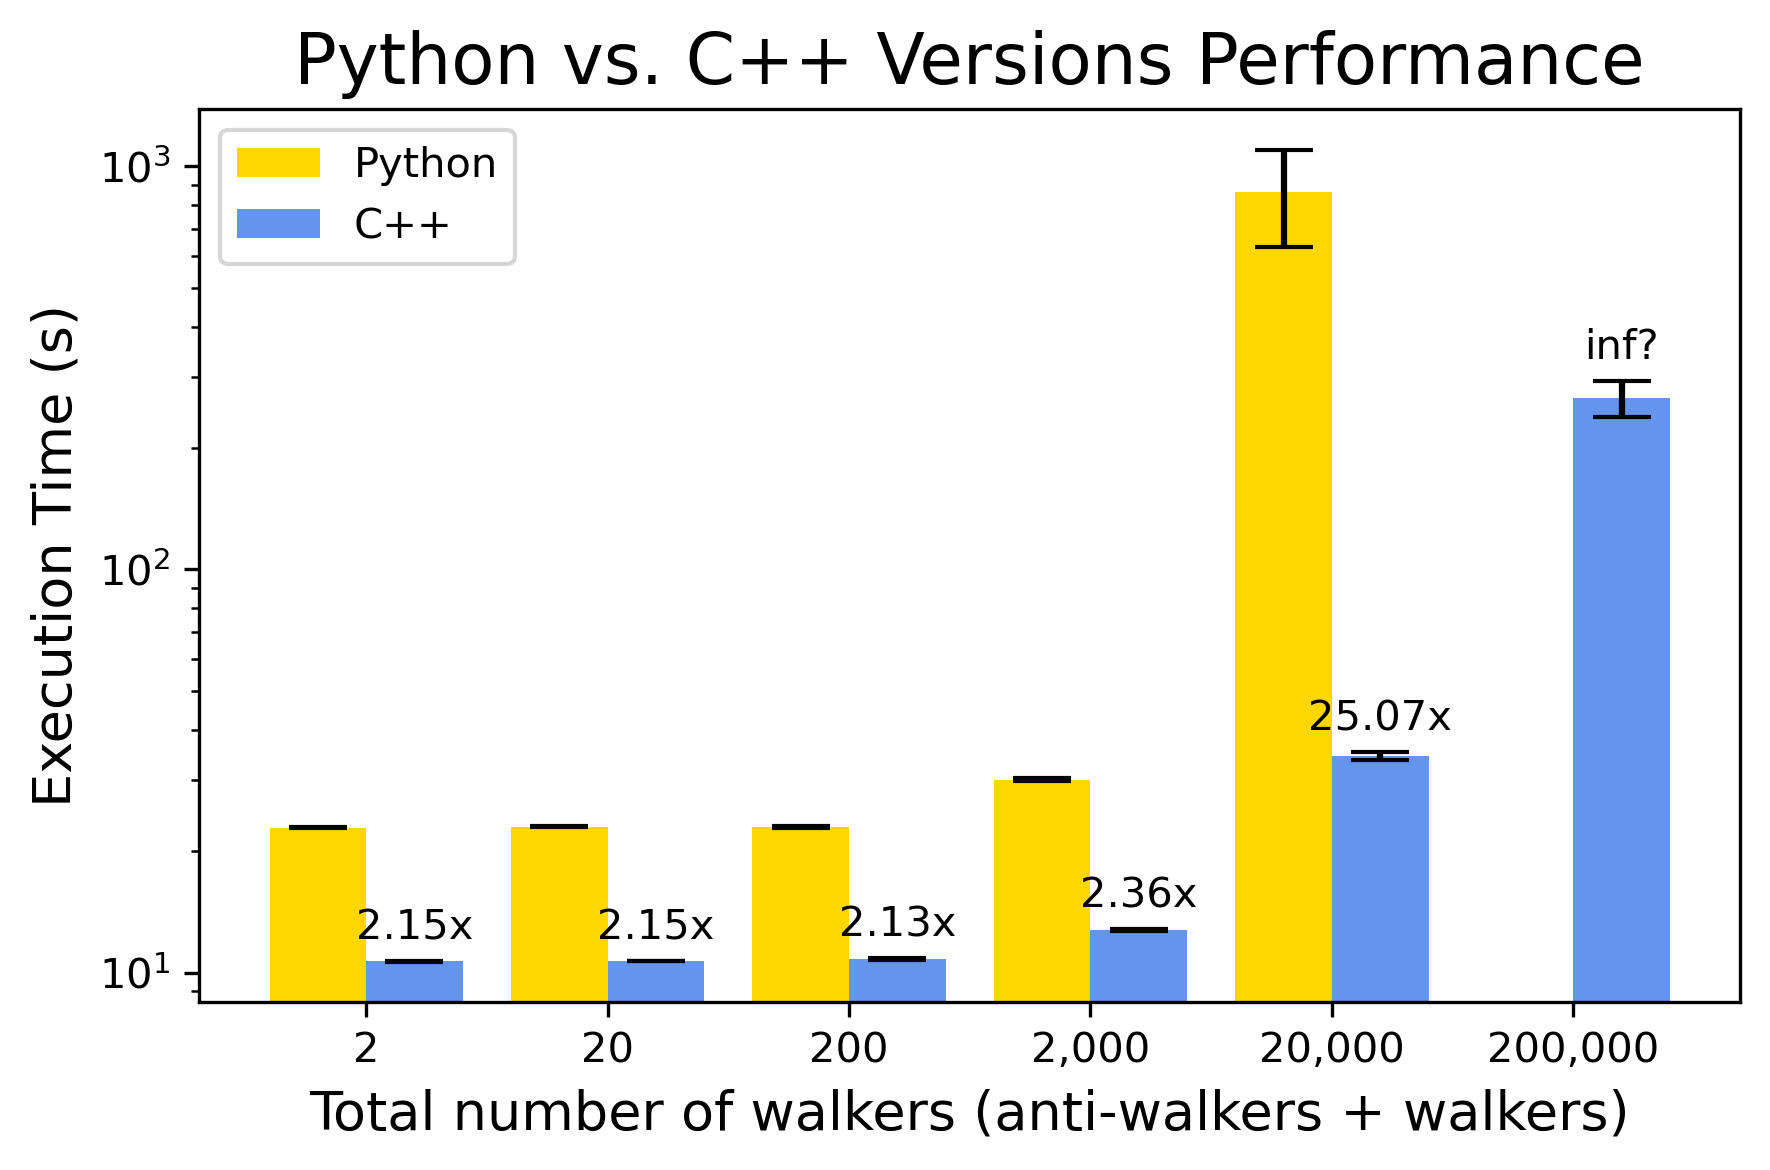

In [6]:
# Plot of all of them
fig = plt.figure(dpi=300)
ax  = plt.gca()

width = 0.4

# Python
pythonBar = plt.bar(np.arange(len(numWalkLabels)) - width/2,
                    pythonAvgs,
                    width,
                    log     = True,
                    yerr    = pythonStdDevs,
                    capsize = 7.,
                    color   = 'gold',
                    label   = "Python")

# C++
cppBar = plt.bar(np.arange(len(numWalkLabels)) + width/2,
                 cppAvgs,
                 width,
                 log     = True,
                 yerr    = cppStdDevs,
                 capsize = 7.,
                 color   = 'cornflowerblue',
                 label   = "C++")

# Set labels + generally prettyness
ax.set_xticks(np.arange(len(numWalkLabels)))
ax.set_xticklabels(numWalkLabels)

ax.bar_label(cppBar, labels = speedups, padding=3)

plt.title('Python vs. C++ Versions Performance', fontsize=titleFontSize)
plt.ylabel('Execution Time (s)', fontsize=axisFontSize)
plt.xlabel('Total number of walkers (anti-walkers + walkers)', fontsize=axisFontSize)

plt.legend(loc='upper left')

fig.patch.set_facecolor('white')
plt.tight_layout()

plt.show()